## Tannis McCartney
## May 27, 2022

### This notebook creates flags for regions (where customers live) and customer activity. The customer activity flag is used to exclude low-activity customers from further analysis.

## Contents:
### 01 Import libraries
### 02 Import data
### 03 Compare spending habits between the regions
### 04 Create a low-activity customer exclusion flag

# 01 Import libraries

In [1]:
# Import libraries for analysis and visualization (separate cells is faster than a single cell)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\4 Python Fundamentals for Data Analysts\05-2022 Instacart Basket Analysis'

In [3]:
# Import merged orders, products and customer data
df_ords_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))
df_ords_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,mean_prices,spending_flag,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,6.37,Low spender,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423


In [4]:
# Check shape of dataframe
df_ords_cust_merge.shape

(32433030, 30)

### Security implications for this data were addressed in notebook 3 (Data Preparation - customers). The names and genders of clients were removed because that is Personally Identifiable Information (PII) and it was not needed for the analysis

# 03 Compare spending habits between the regions

In [5]:
# Create a list for each region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virgina', 'West Virgina', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']
Pacific = ['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
# Create the Northeast Region
df_ords_cust_merge.loc[df_ords_cust_merge['state'].isin(Northeast), 'region'] = 'Northeast'

In [7]:
# Create the Midwest Region
df_ords_cust_merge.loc[df_ords_cust_merge['state'].isin(Midwest), 'region'] = 'Midwest'

In [8]:
# Create the South Region
df_ords_cust_merge.loc[df_ords_cust_merge['state'].isin(South), 'region'] = 'South'

In [9]:
# Create the West Region
df_ords_cust_merge.loc[df_ords_cust_merge['state'].isin(West), 'region'] = 'West'

In [10]:
# Create the Pacific Region
df_ords_cust_merge.loc[df_ords_cust_merge['state'].isin(Pacific), 'region'] = 'Pacific'

In [11]:
# Check the frequency table of the new Region column
df_ords_cust_merge['region'].value_counts()

South        9546224
Midwest      7603550
Northeast    5728144
West         5086991
Pacific      3213150
Name: region, dtype: int64

In [12]:
# Check the dataframe
df_ords_cust_merge.tail(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income,region
32433015,1987169,106143,16,6,21,6.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433016,3143166,106143,17,0,8,15.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433017,3094081,106143,18,4,17,11.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433018,405982,106143,19,3,18,6.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433019,3102310,106143,20,3,16,7.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433020,1539810,106143,21,1,18,5.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433021,3308056,106143,22,4,20,10.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433022,2988973,106143,23,2,22,5.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433023,930,106143,24,6,12,4.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific
32433024,467253,106143,25,6,16,7.0,False,19675,1,1,...,High spender,7.0,Frequent customer,Hawaii,25,5/26/2017,0,single,53755,Pacific


In [13]:
# Create a crosstab of region and spending_flag
crosstab = pd.crosstab(df_ords_cust_merge['region'], df_ords_cust_merge['spending_flag'], dropna=False)

In [14]:
# Display crosstab
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29521,7574029
Northeast,18755,5709389
Pacific,12010,3201140
South,36782,9509442
West,19765,5067226


In [22]:
# Export crosstab to clipboard
crosstab.to_clipboard()

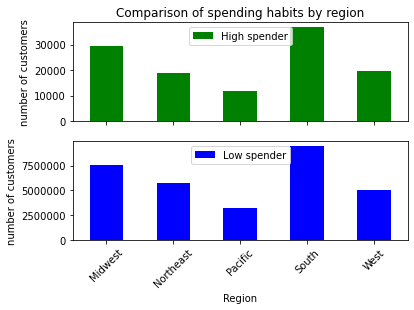

In [51]:
# Create a bar chart of the crosstab
bar=crosstab.plot.bar(
    subplots=True, 
    sharex=True,
    title=['Comparison of spending habits by region', ''],
    color = ['green', 'blue'],
    xlabel = 'Region',
    ylabel = 'number of customers')
bar[1].ticklabel_format(useOffset=False, style='plain', axis='y')
bar[1].tick_params(axis='x', rotation=45)
bar[0].legend(loc='upper center')
bar[1].legend(loc='upper center')

#### There are more high and low spenders in the South than any other region. There are fewer high and low spenders in the Pacific than any other region. This data should be normalized.

In [53]:
# Export bar chart
bar[1].figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10-bar-regions.png'), bbox_inches='tight')

# 04 Create a low-activity customer exclusion flag

In [54]:
# Create low-activity flag (max_order < 5 = True) using the previously derived max_order column
df_ords_cust_merge.loc[df_ords_cust_merge['max_order'] < 5, 'low_activity_customer'] = 'True'

In [55]:
# Set the regular-activity flag (max_order >= 5= False)
df_ords_cust_merge.loc[df_ords_cust_merge['max_order'] >= 5, 'low_activity_customer'] = 'False'

In [56]:
# Check the frequency count of the new flag
df_ords_cust_merge['low_activity_customer'].value_counts()

False    30991542
True      1441488
Name: low_activity_customer, dtype: int64

In [28]:
# Create a subset that exclues the low-activity customers
cust_5_plus_orders = df_ords_cust_merge[df_ords_cust_merge['low_activity_customer'] == 'False']
cust_5_plus_orders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,median_days_since_order,order_frequency,state,age,date_joined,dependants,household_status,income,region,low_activity_customer
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Alabama,31,2/17/2019,3,married,40423,South,False


In [29]:
# Check the max_order column - all values should be >= 5
cust_5_plus_orders['max_order'].min()

5

In [30]:
# Export the subset
cust_5_plus_orders.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_5_plus_orders.pkl'))